In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [16]:
x_train_flaten=x_train/255
x_test_flaten=x_test/255

In [22]:
model=keras.Sequential(
[
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(25,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics='accuracy',
)

In [23]:
model.fit(x_train/255,y_train,epochs=10)

Epoch 1/10


1875/1875 [==============================] - 12s 4ms/step - loss: 0.7152 - accuracy: 0.8372
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2425 - accuracy: 0.9326
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1761 - accuracy: 0.9496
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1395 - accuracy: 0.9595
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1167 - accuracy: 0.9668
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0995 - accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866 - accuracy: 0.9753
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0761 - accuracy: 0.9783
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0680 - accuracy: 0.9803
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.

In [25]:
model.evaluate(x_test,y_test)
y_predicted=model.predict(x_test)
y_predict=[np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 3ms/step


In [26]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    3,    3,    0,    1,    7,    1,    3,    1],
       [   0, 1113,    6,    3,    1,    1,    5,    0,    5,    1],
       [   6,    1,  987,   12,    2,    1,    1,    3,   19,    0],
       [   0,    1,    6,  977,    1,    8,    0,    5,   11,    1],
       [   4,    0,    7,    1,  940,    0,    8,    3,    3,   16],
       [   7,    3,    1,   31,    2,  818,    4,    2,   16,    8],
       [   7,    3,   15,    1,    3,    5,  914,    0,   10,    0],
       [   1,    3,   17,   16,    3,    1,    0,  964,    8,   15],
       [   5,    2,    8,   11,    2,    9,    6,    3,  926,    2],
       [   3,    6,    0,   10,   29,    6,    3,    9,   15,  928]])>

In [27]:
import seaborn as sn

<Axes: >

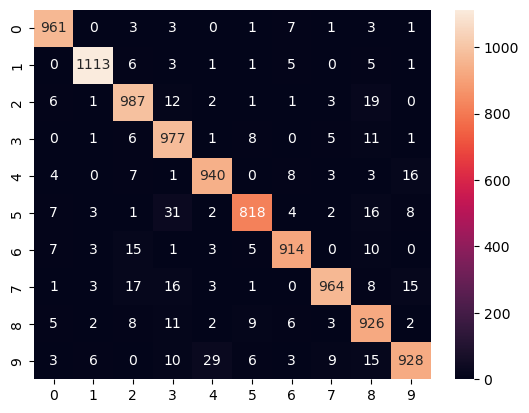

In [61]:

sn.heatmap(cm,annot=True,fmt='d')